<a href="https://colab.research.google.com/github/vjihye/TIL/blob/master/3_7___CNN_MNIST_Handwritten_Digit_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
from keras.datasets import mnist

In [3]:
(trainx, trainy), (testx, testy) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
trainx = trainx.reshape((trainx.shape[0], 28, 28, 1))
testx = testx.reshape((testx.shape[0], 28, 28, 1))

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
trainy = to_categorical(trainy)
testy = to_categorical(testy)

## Baseline Model
### - prepare Pixel Data

In [16]:
def load_dataset():
  (trainx, trainy), (testx, testy) = mnist.load_data()
  trainx = trainx.reshape((trainx.shape[0], 28, 28, 1))
  testx = testx.reshape((testx.shape[0], 28, 28, 1))
  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  return trainx, trainy, testx, testy

In [18]:
def prep_pixels(train, test):
  train_norm = train.astype('float32') # int->floae 로 변환
  test_norm = test.astype('float32')
  train_norm = train_norm / 255.0 # 0~1로 만들기
  test_norm = test_norm / 255.0
  return train_norm, test_norm
 

### - define cnn model

In [37]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', input_shape = (28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
 # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [42]:
# evaluate a model using k-fold cross-validation
def evaluate_model(datax, datay, n_folds=5):
  scores, histories = list(), list()

# prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)

# enumerate splits
  for train_ix, test_ix in kfold.split(datax):
    model = define_model()
    trainx, trainy, testx, testy = datax[train_ix], datay[train_ix], datax[test_ix], datay[test_ix]
    history = model.fit(trainx, trainy, epochs=10, batch_size=32, validation_data = (testx, testy), verbose=0)
    _, acc = model.evaluate(testx, testy, verbose=0)
    print('>%.3f'%(acc*100.0))
    scores.append(acc)
    histories.append(history)
  return scores, histories

### - plot diagnostic learning curves

In [23]:
def summerize_diagnostics(histories):
  for i in range(len(histories)):
    pyplot.subplot(2,1,1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')

    pyplot.subplot(2,1,2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  pyplot.show()


### - summarize model performance

In [45]:
def summarize_performance(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  pyplot.boxplot(scores)
  pyplot.show()

### - Running

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


>98.467
>98.550
>98.592
>98.800
>98.725


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


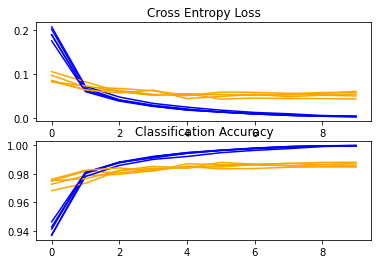

Accuracy: mean=98.627 std=0.120, n=5


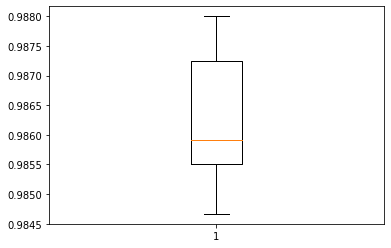

In [46]:
def run_test_harness():
  trainx, trainy, testx, testy = load_dataset()
  trainx, testx = prep_pixels(trainx, testx)
  scores, histories = evaluate_model(trainx, trainy)
  summerize_diagnostics(histories)
  summarize_performance(scores)
run_test_harness()